In [348]:
# Import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Import the data
first_dataset = pd.read_csv('Labelled Financial News.csv')
second_dataset = pd.read_csv('all-data.csv', encoding="iso-8859-1")



In [349]:
first_dataset.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [350]:
second_dataset.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [351]:
# Need to rename the columns in the second dataset
second_dataset.columns = ['Sentiment', 'Sentence']

second_dataset.head()

,Sentiment,Sentence
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [352]:
# Need to combine the two datasets into one
combined_dataset = pd.concat([first_dataset, second_dataset], ignore_index=True)

# Swap the columns around so that sentiment is the first column
cols = combined_dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
combined_dataset = combined_dataset[cols]

combined_dataset

,Sentiment,Sentence
0,positive,The GeoSolutions technology will leverage Bene...
1,negative,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,positive,"For the last quarter of 2010 , Componenta 's n..."
3,neutral,According to the Finnish-Russian Chamber of Co...
4,neutral,The Swedish buyout firm has sold its remaining...
...,...,...
10682,negative,LONDON MarketWatch -- Share prices ended lower...
10683,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
10684,negative,Operating profit fell to EUR 35.4 mn from EUR ...
10685,negative,Net sales of the Paper segment decreased to EU...


In [353]:
# Save the combined dataset
combined_dataset.to_csv('combined_dataset.csv', index=False)

In [354]:
!pip install Sentenceblob

ERROR: Could not find a version that satisfies the requirement Sentenceblob (from versions: none)
ERROR: No matching distribution found for Sentenceblob


In [355]:
!pip install xgboost

In [356]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline

import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
sgd = SGDClassifier()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')  

In [357]:
combined_dataset['Sentiment'].value_counts()

Sentiment
neutral     6008
positive    3215
negative    1464
Name: count, dtype: int64

In [358]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
combined_dataset['Sentiment'] = label_encoder.fit_transform(combined_dataset['Sentiment'])

combined_dataset

,Sentiment,Sentence
0,2,The GeoSolutions technology will leverage Bene...
1,0,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,2,"For the last quarter of 2010 , Componenta 's n..."
3,1,According to the Finnish-Russian Chamber of Co...
4,1,The Swedish buyout firm has sold its remaining...
...,...,...
10682,0,LONDON MarketWatch -- Share prices ended lower...
10683,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
10684,0,Operating profit fell to EUR 35.4 mn from EUR ...
10685,0,Net sales of the Paper segment decreased to EU...


In [359]:
# # Remove duplicates
# combined_dataset.drop_duplicates(inplace=True)

# combined_dataset

In [360]:
combined_dataset["Sentiment"].value_counts()

df = combined_dataset

In [361]:
def preprocess_data(input_df):
    result_df = input_df.copy()
    result_df["Sentence"]=result_df["Sentence"].str.lower() #We convert our Sentences to lowercase.
    result_df["Sentence"]=result_df["Sentence"].str.replace("[^\w\s]","") #We remove punctuation marks from our Sentences.
    result_df["Sentence"]=result_df["Sentence"].str.replace("\d+","") #We are removing numbers from our Sentences.
    result_df["Sentence"]=result_df["Sentence"].str.replace("\n","").replace("\r","") #We remove spaces in our Sentences.
    result_df_Sentiment=result_df[result_df['Sentiment']=="Sentiment"]
    result_df_positive=result_df[result_df['Sentiment']=="positive"]
    result_df_negative=result_df[result_df['Sentiment']=="negative"]
    # df["Sentiment"]=df["Sentiment"].map({"positive":1,"negative":0,"Sentiment":2})
    # df['Sentiment']=df['Sentiment'].astype(int)
    df1=result_df[df['Sentiment']!=1]
    #We divide it into positive and negative.
    # Change all of the sentiment valuea that are 2 to 1
    df1["Sentiment"]=df1["Sentiment"].replace(2,1)
    # Remove stop words
    
    return df1

def preprocess(input_df, text_column):
    result_df = input_df.copy()
    
    # Apply preprocessing steps to the specified text column
    result_df[text_column] = result_df[text_column].str.lower()  # Convert to lowercase
    result_df[text_column] = result_df[text_column].str.replace("[^\w\s]", "", regex=True)  # Remove punctuation marks
    result_df[text_column] = result_df[text_column].str.replace("\d+", "", regex=True)  # Remove numbers
    result_df[text_column] = result_df[text_column].str.replace("\s+", " ", regex=True)  # Replace newlines and multiple spaces with a single space

    # Filter rows and modify 'Sentiment' column values
    result_df = result_df[result_df['Sentiment'] != 1]
    result_df["Sentiment"] = result_df["Sentiment"].replace(2, 1)

    return result_df


In [362]:
preprocessed_df = preprocess(df, 'Sentence')
df1 = preprocessed_df

In [363]:
df1

,Sentiment,Sentence
0,1,the geosolutions technology will leverage bene...
1,0,esi on lows down to bk a real possibility
2,1,for the last quarter of componenta s net sales...
5,1,spy wouldnt be surprised to see a green close
6,0,shells billion bg deal meets shareholder skept...
...,...,...
10681,0,helsinki thomson financial shares in cargotec ...
10682,0,london marketwatch share prices ended lower in...
10684,0,operating profit fell to eur mn from eur mn in...
10685,0,net sales of the paper segment decreased to eu...


In [364]:
# vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.Sentence
y=df1.Sentiment
# x=CountVectorizer(lowercase=True,stop_words="english").fit_transform(x)

In [365]:
min_class_size = y.value_counts().min()

# Resample each class to have the same number of instances
data_balanced = pd.concat([
    y[y == 1].sample(n=min_class_size, random_state=42),
    y[y == 0].sample(n=min_class_size, random_state=42)
])
data_balanced

4138     1
479      1
8105     1
3691     1
3270     1
        ..
10213    0
10493    0
5843     0
10681    0
10201    0
Name: Sentiment, Length: 2928, dtype: int64

In [366]:
def sentiment_classification_funct(x, y):
    # Find the number of instances of the smallest class
    min_class_size = y.value_counts().min()

    # Resample each class to have the same number of instances
    data_balanced = pd.concat([
        y[y == 1].sample(n=min_class_size, random_state=42),
        y[y == 0].sample(n=min_class_size, random_state=42)
    ])

    # Now perform a stratified split
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size=0.1,
        random_state=60,
        stratify=y  # Ensure stratification
    )
    
    # Algorithms to be used in pipelines
    algos = [
        KNeighborsClassifier(n_neighbors=5, weights='distance'),
        DecisionTreeClassifier(max_depth=10, min_samples_split=20),
        RandomForestClassifier(n_estimators=100, max_features='sqrt'),
        LogisticRegression(C=1.0, solver='liblinear'),
        MultinomialNB(alpha=1.0),
        GradientBoostingClassifier(),
        XGBClassifier(),
        SGDClassifier()
    ]
    
    algo_names = [
        'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier',
        'LogisticRegression', 'MultinomialNB', 'GradientBoostingClassifier',
        'XGBClassifier', 'SGDClassifier'
    ]

    accuracy_scored = []
    precision_scored = []
    recall_scored = []
    f1_scored = []

    # Create a directory for models if it doesn't exist
    models_directory = "models"
    if not os.path.exists(models_directory):
        os.makedirs(models_directory)

    # Create a figure with subplots
    # fig, axes = plt.subplots(nrows=len(algos), ncols=1, figsize=(10, len(algos) * 4))
    # fig.tight_layout(pad=3.0)
    import math
    n_algos = len(algos)
    # Calculate the number of rows and columns to get a square layout (or as close as possible)
    n_cols = math.ceil(math.sqrt(n_algos))
    n_rows = math.ceil(n_algos / n_cols)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes_flat = axes.flatten()

    for idx, (algo, name) in enumerate(zip(algos, algo_names)):
        # Create a pipeline
        pipeline = Pipeline([
            ('vect', CountVectorizer(lowercase=True, stop_words='english')),
            ('clf', algo)
        ])

        # Fit the pipeline
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)

        # Evaluation Metrics
        accuracy_scored.append(accuracy_score(y_test, y_pred))
        precision_scored.append(precision_score(y_test, y_pred))
        recall_scored.append(recall_score(y_test, y_pred))
        f1_scored.append(f1_score(y_test, y_pred))

        # Print classification report
        # print(f"Classification Report for {name}:")
        # print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cf_matrix = confusion_matrix(y_test, y_pred)
        categories = ['Negative', 'Positive']
        sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g',
                    xticklabels=categories, yticklabels=categories, ax=axes_flat[idx])
        axes_flat[idx].set_title(f"Confusion Matrix for {name}")
        axes_flat[idx].set_xlabel("Predicted values")
        axes_flat[idx].set_ylabel("Actual values")
        
        with open(os.path.join(models_directory, name + '_pipeline.pkl'), 'wb') as file:
            pickle.dump(pipeline, file)

        # Save the individual confusion matrix plot
        plt.savefig(f'confusion_plots/{name}_confusion_matrix.png')

        # Save the individual confusion matrix plot
        plt.savefig(f'confusion_plots/{name}_confusion_matrix.png')

    # Display the figure with all confusion matrices
    # Hide any empty subplots
    for idx in range(n_algos, n_rows * n_cols):
        fig.delaxes(axes_flat[idx])

    # Adjust layout
    plt.tight_layout()
    plt.savefig('confusion_plots/all_confusion_matrices.png', dpi= 600)
    plt.show()

    # Save the pipeline
    # for algo, name in zip(algos, algo_names):
    #     with open(os.path.join(models_directory, name + '_pipeline.pkl'), 'wb') as file:
    #         pickle.dump(pipeline, file)

    result = pd.DataFrame(
        columns=['f1_score', 'recall_score', 'precision_score', 'accuracy_score'],
        index=algo_names
    )
    result.f1_score = f1_scored
    result.recall_score = recall_scored
    result.precision_score = precision_scored
    result.accuracy_score = accuracy_scored
    
    return result.sort_values('f1_score', ascending=False)


In [367]:
x

0        the geosolutions technology will leverage bene...
1                esi on lows down to bk a real possibility
2        for the last quarter of componenta s net sales...
5            spy wouldnt be surprised to see a green close
6        shells billion bg deal meets shareholder skept...
                               ...                        
10681    helsinki thomson financial shares in cargotec ...
10682    london marketwatch share prices ended lower in...
10684    operating profit fell to eur mn from eur mn in...
10685    net sales of the paper segment decreased to eu...
10686    sales in finland decreased by in january while...
Name: Sentence, Length: 4679, dtype: object

In [368]:
y

0        1
1        0
2        1
5        1
6        0
        ..
10681    0
10682    0
10684    0
10685    0
10686    0
Name: Sentiment, Length: 4679, dtype: int64

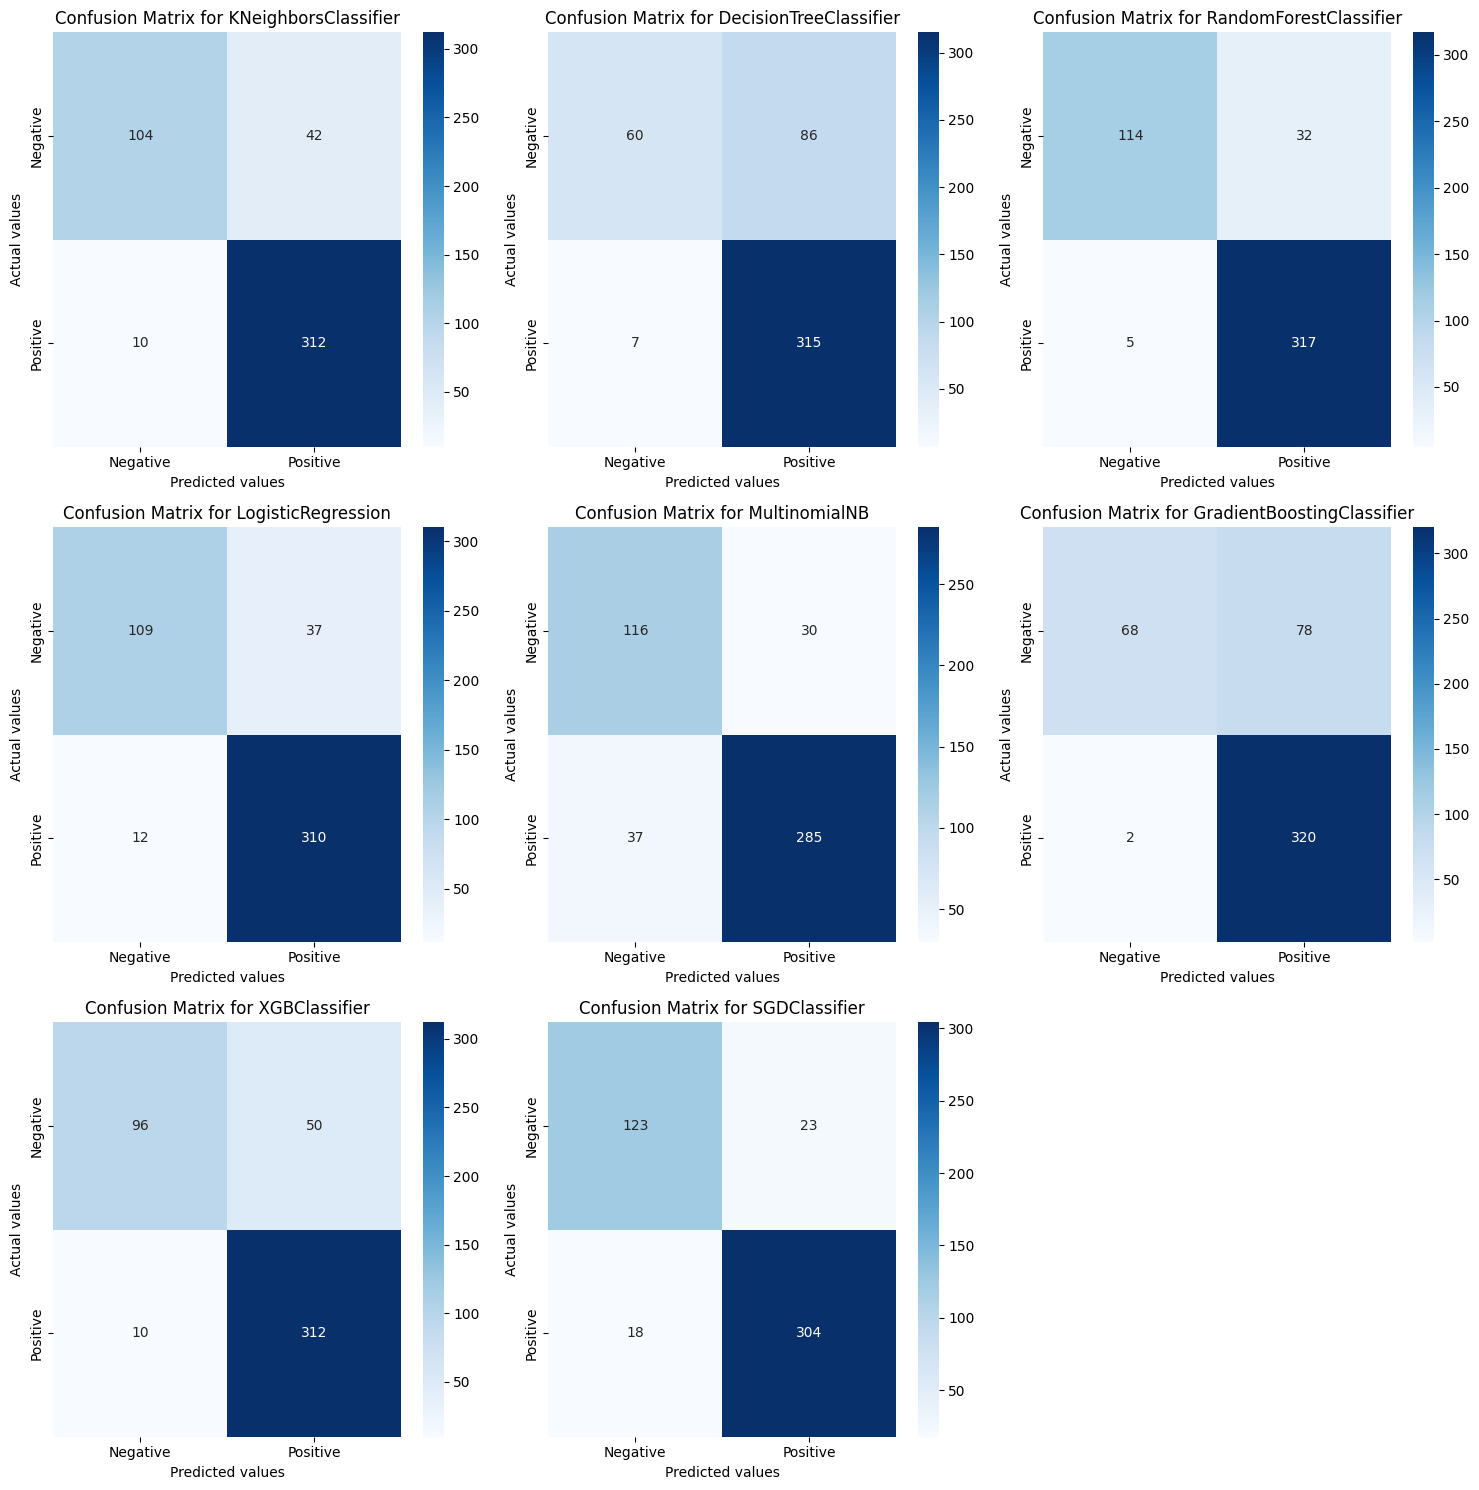

In [369]:
results = sentiment_classification_funct(x, y)

In [370]:
results

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.944858,0.984472,0.908309,0.920940
SGDClassifier,0.936826,0.944099,0.929664,0.912393
LogisticRegression,0.926756,0.962733,0.893372,0.895299
KNeighborsClassifier,0.923077,0.968944,0.881356,0.888889
XGBClassifier,0.912281,0.968944,0.861878,0.871795
MultinomialNB,0.894819,0.885093,0.904762,0.856838
GradientBoostingClassifier,0.888889,0.993789,0.804020,0.829060
DecisionTreeClassifier,0.871369,0.978261,0.785536,0.801282
